In [1]:
%load_ext autoreload
%autoreload 2

import tools.clusterfit as cf
import numpy as np
import pandas as pd

input = '/data1/yujiehe/data/samples-lightcone0.csv'
data = pd.read_csv(input)
data

,id,redshift,theta_on_lc,phi_on_lc,M_fof_lc,x_lc,y_lc,z_lc,M_fof_soap,M500,...,LX0InRestframeWithoutRecentAGNHeatingCoreExcision,GasTemperatureWithoutRecentAGNHeatingCoreExcision,SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision,Y5R500WithoutRecentAGNHeating,Vx,Vy,Vz,Lcore/Ltot,ObservedRedshift,Flux
0,6010543,0.218876,26.705823,-76.846012,1.099057e+14,185.582736,-794.103995,410.258186,1.099512e+14,5.614381e+13,...,6.891204e+42,1.430217,1.431629,2.685261,272.641300,223.341250,140.04132,0.993070,0.218568,7.882944e-12
1,10132384,0.259387,-49.538665,-76.554212,1.662498e+14,161.799804,-676.764966,-815.835356,1.663011e+14,1.050034e+14,...,2.389914e+43,1.846717,1.965313,5.416267,-86.806150,154.793820,-158.80615,0.984025,0.259429,8.198552e-12
2,1985680,0.199581,-52.456777,76.725044,5.806272e+14,117.127131,496.451793,-663.713861,5.805421e+14,3.958242e+14,...,1.695623e+44,4.275121,4.704328,51.893689,-52.412230,-219.912230,195.58777,0.969723,0.198410,5.692966e-11
3,12678187,0.067892,46.872072,-96.425385,1.123389e+14,-22.503792,-199.826543,214.679297,1.122876e+14,7.627862e+13,...,1.044361e+43,1.527636,1.640585,2.575471,-52.114807,-77.114810,324.38513,0.938963,0.068936,1.677968e-11
4,3420038,0.113630,38.887460,-3.131552,1.728895e+14,376.672760,-20.607910,304.254847,1.728982e+14,7.792789e+13,...,1.387649e+43,1.793066,1.849541,6.404369,-232.317380,-135.117370,169.58264,0.933735,0.113376,7.033075e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,12882763,0.052263,43.009397,-35.045370,1.727982e+14,135.647971,-95.141897,154.556921,1.728982e+14,1.437612e+14,...,3.166357e+43,2.304160,2.391696,10.978919,-296.424680,159.875300,135.37530,0.011669,0.051729,5.409843e-12
766,2680060,0.114146,-47.506732,90.854619,1.012186e+15,-4.937446,330.994150,-361.342140,1.012650e+15,3.056642e+14,...,1.688058e+44,6.404210,6.144428,135.260278,204.244630,-15.655395,-837.35535,0.010340,0.116396,5.656698e-12
767,4646616,0.125712,-33.564085,-169.939991,8.079670e+14,-442.983802,-78.588470,-298.507096,8.081410e+14,4.139661e+14,...,2.261872e+44,6.189608,6.539750,140.383773,-671.887400,77.012570,-361.78735,0.002155,0.128495,6.101368e-12
768,11897198,0.016366,-33.124879,-28.281435,3.261190e+14,53.345272,-28.701178,-39.526618,3.260052e+14,2.232009e+14,...,5.882689e+43,3.365881,3.648254,27.483893,143.502800,39.602783,100.90283,0.001408,0.016484,1.030848e-10


# LX-T

In [2]:
N = 313

sample = data
LX     = sample[cf.Columns.LX]
T      = sample[cf.Columns.T]
z      = sample.redshift_obs
id     = sample.id

logLX_ = cf.logY_(LX, z, relation='LX-T')
logT_  = cf.logX_(T, relation='LX-T')

In [3]:
best_fit, outlier_id = cf.fit(
    logLX_, logT_, N=N,
    B_min    = 1.5,  B_max    = 3,
    logA_min = -0.1, logA_max = 1,
    scat_min = 0.1,  scat_max = 1,
    remove_outlier=True, id = id
)
print(best_fit, outlier_id)

Fit: 1


Best fit found:  {logA: 0.34099999999999997, B: 2.379, scat: 0.226, chi2: 1.0117294158207897}
Outliers found: 4
Outlier ids: [ 6010543. 10132384.  1985680.  2943980.]
Fit: 2
Iteration: 1
Best fit found:  {logA: 0.32899999999999996, B: 2.433, scat: 0.163, chi2: 0.9573176534092385}
Outliers found: 2
Outlier ids: [ 6010543. 10132384.  1985680.  2943980. 12678187.  3420038.]
Fit: 3
Iteration: 2
Best fit found:  {logA: 0.32899999999999996, B: 2.473, scat: 0.14200000000000002, chi2: 1.0190833028047044}
Outliers found: 0
Total outliers: 6
{logA: 0.32899999999999996, B: 2.473, scat: 0.14200000000000002, chi2: 1.0190833028047044} [ 6010543. 10132384.  1985680.  2943980. 12678187.  3420038.]


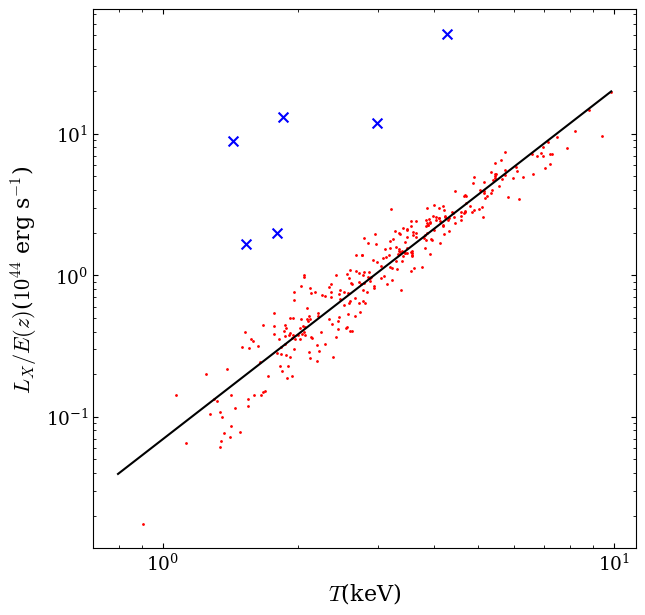

In [4]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')

fig, ax = plt.subplots(figsize=(7,7))
# data points
mask = np.isin(id, outlier_id)
ax.scatter(T[~mask][:N], 10**logLX_[~mask][:N], s=1, color='r') # fitted non-outliers
ax.scatter(T[mask], 10**logLX_[mask], s=50, color='b', marker='x') # all outliers

# --------------BEST FIT LINE----------------
Tlin = np.linspace(np.min(T), np.max(T), 100)
LXlin = cf.predictY_(Tlin/4, **best_fit)
ax.plot(Tlin, LXlin, color='black')
# ------------END BEST FIT-------------------
ax.set(xlabel='$T$(keV)', ylabel='$L_X/E(z)$($10^{{44}}$ erg s$^{-1}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# YSZ-T

In [6]:
N = 260

sample = data
YSZ    = sample[cf.Columns['YSZ']]
T      = sample[cf.Columns['T']]
z      = sample['ObservedRedshift']
id     = sample['id']

logYSZ_ = cf.logY_(YSZ, z, relation='YSZ-T')
logT_   = cf.logX_(T, relation='YSZ-T')

In [7]:
best_fit, outlier_id = cf.fit(
    logYSZ_, logT_, N=N,
    B_min    = 2,    B_max    = 3.5,
    logA_min = -1, logA_max = 1,
    scat_min = 0.01,  scat_max = 1, scat_step=0.007,
    remove_outlier=True, id = id
)
print(best_fit, outlier_id)

Fit: 1
Best fit found:  {logA: 0.326, B: 2.726, scat: 0.122, chi2: 0.9931599454246705}
Outliers found: 2
Outlier ids: [12278914. 11861592.]
Fit: 2
Iteration: 1
Best fit found:  {logA: 0.323, B: 2.745, scat: 0.108, chi2: 1.0173675855155284}
Total outliers: 2
{logA: 0.323, B: 2.745, scat: 0.108, chi2: 1.0173675855155284} [12278914. 11861592.]


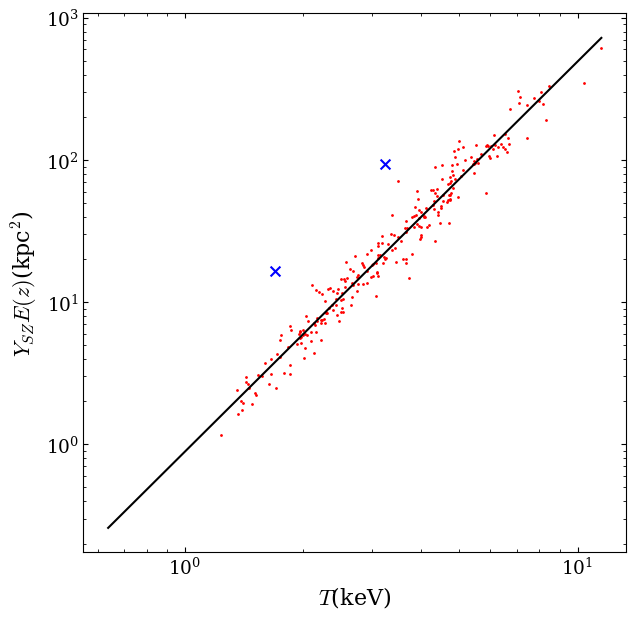

In [8]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')

fig, ax = plt.subplots(figsize=(7,7))
# data points
mask = np.isin(id, outlier_id)
ax.scatter(T[~mask][:N], 10**logYSZ_[~mask][:N]*35, s=1, color='r') # fitted non-outliers
ax.scatter(T[mask], 10**logYSZ_[mask]*35, s=50, color='b', marker='x') # all outliers

# --------------BEST FIT LINE----------------
Tlin = np.linspace(np.min(T), np.max(T), 100)
YSZ_lin = cf.predictY_(Tlin/5, **best_fit)
ax.plot(Tlin, YSZ_lin*35, color='black')
# ------------END BEST FIT-------------------

ax.set(xlabel='$T$(keV)', ylabel='$Y_{{SZ}} E(z)$(kpc$^{{2}}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [10]:
id[mask]

87     12278914
252    11861592
Name: id, dtype: int64

In [23]:
np.abs((logYSZ_[mask] - 0.326 - 2.726*logT_[mask]) / 0.122)

array([5.054624, 5.179042], dtype=float32)

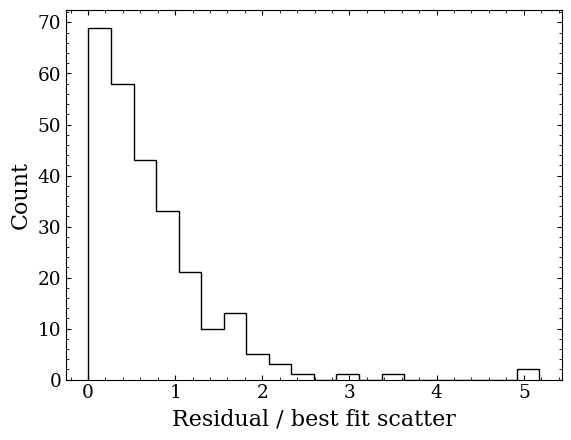

In [38]:
res = np.abs(logYSZ_[:N] - 0.326 - 2.726*logT_[:N])/0.122
plt.hist(
    res, bins=20, histtype='step', color='black'
)
plt.xlabel('Residual / best fit scatter')
plt.ylabel('Count')
plt.show()

# LX-YSZ

In [8]:
N = 460

sample = data
YSZ    = sample[cf.Columns.YSZ]
LX     = sample[cf.Columns.LX]
z      = sample.redshift_obs

logLX_  = cf.logY_(LX, z, relation='LX-YSZ')
logYSZ_ = cf.logX_(YSZ, relation='LX-YSZ')

In [9]:
best_fit, outlier_id = cf.fit(
    logLX_, logYSZ_, N = N,
    B_min    = 0.2,  B_max    = 2,
    logA_min = -1,  logA_max = 1,
    scat_min = 0.01, scat_max = 1, scat_step = 0.007,
    remove_outlier=True, id = id
)
print(best_fit, outlier_id)

Fit: 1


Best fit found:  {logA: 0.371, B: 0.851, scat: 0.21300000000000002, chi2: 1.0092483498324603}
Outliers found: 5
Outlier ids: [ 6010543. 10132384.  1985680. 12678187.  2943980.]
Fit: 2
Iteration: 1
Best fit found:  {logA: 0.3680000000000001, B: 0.875, scat: 0.157, chi2: 1.0092562672475023}
Outliers found: 3
Outlier ids: [ 6010543. 10132384.  1985680. 12678187.  2943980.  3420038. 12278914.
 12091770.]
Fit: 3
Iteration: 2
Best fit found:  {logA: 0.371, B: 0.881, scat: 0.15000000000000002, chi2: 0.9501909760096098}
Outliers found: 0
Total outliers: 8
{logA: 0.371, B: 0.881, scat: 0.15000000000000002, chi2: 0.9501909760096098} [ 6010543. 10132384.  1985680. 12678187.  2943980.  3420038. 12278914.
 12091770.]


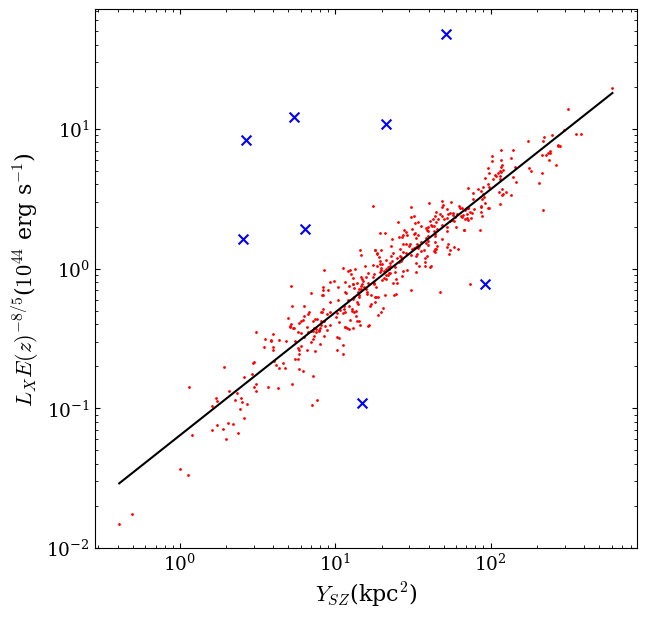

In [10]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')

fig, ax = plt.subplots(figsize=(7,7))
# data points
mask = np.isin(id, outlier_id)
ax.scatter(YSZ[~mask][:N], 10**logLX_[~mask][:N], s=1, color='r') # fitted non-outliers
ax.scatter(YSZ[mask], 10**logLX_[mask], s=50, color='b', marker='x') # all outliers

# --------------BEST FIT LINE----------------
logYSZ_lin = np.linspace(np.min(logYSZ_), np.max(logYSZ_), 100)
logLX_lin = cf.predictlogY_(logYSZ_lin, **best_fit)
ax.plot(10**logYSZ_lin*60, 10**logLX_lin, color='black')
# ------------END BEST FIT-------------------

ax.set(xlabel='$Y_{{SZ}}$(kpc$^2$)', 
       ylabel='$L_X E(z)^{{-8/5}}$($10^{{44}}$ erg s$^{{-1}}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# M-T

In [11]:
N = 300

sample = data # some number, ask Kostas about this
M      = sample[cf.Columns.M]
T      = sample[cf.Columns.T]
z      = sample.redshift_obs

logM_  = cf.logY_(M, z, relation='M-T')
logT_  = cf.logX_(T, relation='M-T')

In [12]:
best_fit, outlier_id = cf.fit(
    logM_,   logT_,   N=N,
    B_min    = 1,  B_max      = 2.5,
    logA_min = -1,   logA_max = 1,
    scat_min = 0.01, scat_max = 1, scat_step = 0.007,
    remove_outlier=True, id = id
)
print(best_fit, outlier_id)

Fit: 1
Best fit found:  {logA: 0.12200000000000011, B: 2.019, scat: 0.08, chi2: 0.8774791282867351}
Outliers found: 0
Total outliers: 0
{logA: 0.12200000000000011, B: 2.019, scat: 0.08, chi2: 0.8774791282867351} []


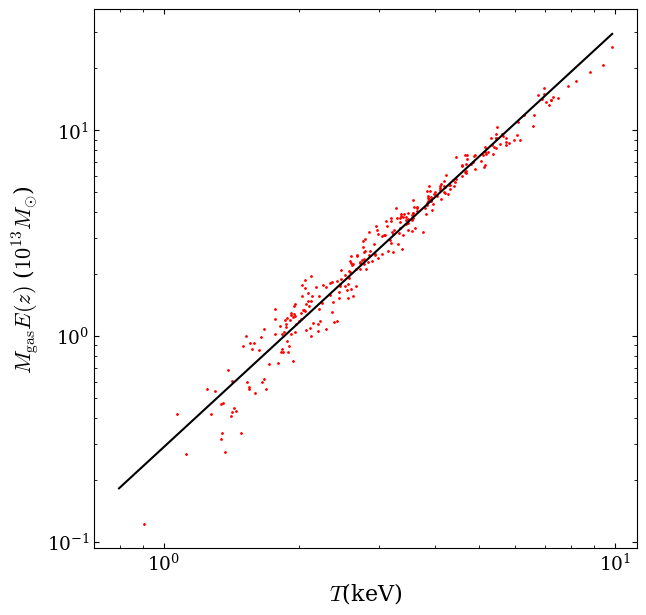

In [13]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')

fig, ax = plt.subplots(figsize=(7,7))
# data points # M*2 because M has unit 2e13 Msun
mask = np.isin(id, outlier_id)
ax.scatter(T[~mask][:N], 10**logM_[~mask][:N]*2, s=1, color='r') # fitted non-outliers
ax.scatter(T[mask], 10**logM_[mask]*2, s=50, color='b', marker='x') # all outliers

# --------------BEST FIT LINE----------------
Tlin = np.linspace(np.min(T), np.max(T), 100)
M_lin = cf.predictY_(Tlin/cf.PAR['M-T']['CX'], **best_fit)
ax.plot(Tlin, M_lin*2, color='black')
# ------------END BEST FIT-------------------

ax.set(xlabel='$T$(keV)', 
       ylabel='$M_\\mathrm{{gas}} E(z)$ ($10^{{13}} M_{{\\odot}}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# LX-M

In [14]:
N = 300

sample = data
LX     = sample[cf.Columns.LX]
M      = sample[cf.Columns.M]
z      = sample.redshift_obs

logLX_ = cf.logY_(LX, z, relation='LX-M')
logM_  = cf.logX_(M, relation='LX-M')

In [15]:
best_fit, outlier_id = cf.fit(
    logLX_, logM_, N=N,
    B_min    = 0.5,  B_max  = 2,
    logA_min = -1, logA_max = 1,
    scat_min = 0.01, scat_max = 1, scat_step = 0.007,
    remove_outlier=True, id = id
)
print(best_fit, outlier_id)

Fit: 1
Best fit found:  {logA: -0.09699999999999998, B: 1.185, scat: 0.20600000000000002, chi2: 1.0016674525651748}
Outliers found: 6
Outlier ids: [ 6010543. 10132384.  1985680. 12678187.  3420038.  2943980.]
Fit: 2
Iteration: 1
Best fit found:  {logA: -0.13, B: 1.248, scat: 0.087, chi2: 0.9034588227385189}
Outliers found: 1
Outlier ids: [ 6010543. 10132384.  1985680. 12678187.  3420038.  2943980.  4762170.]
Fit: 3
Iteration: 2
Best fit found:  {logA: -0.133, B: 1.249, scat: 0.08, chi2: 1.0028196256133828}
Outliers found: 0
Total outliers: 7
{logA: -0.133, B: 1.249, scat: 0.08, chi2: 1.0028196256133828} [ 6010543. 10132384.  1985680. 12678187.  3420038.  2943980.  4762170.]


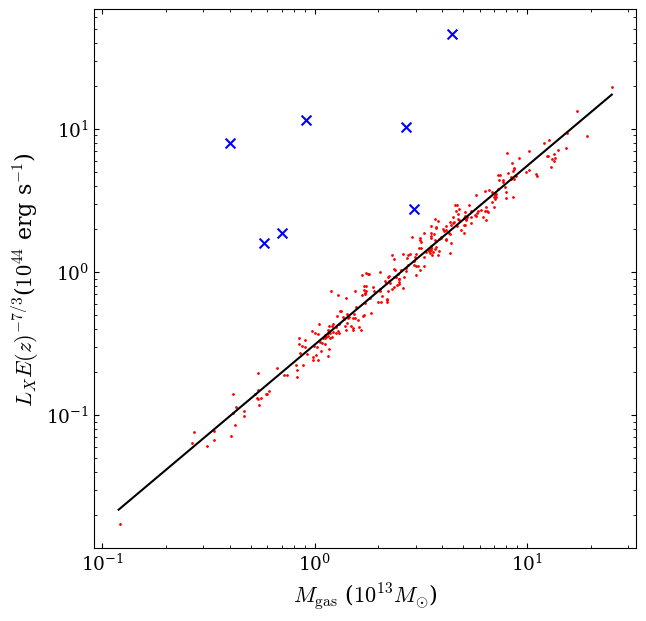

In [16]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')

fig, ax = plt.subplots(figsize=(7,7))
# data points # M*2 because M has unit 2e13 Msun
mask = np.isin(id, outlier_id)
ax.scatter(10**logM_[~mask][:N]*2, 10**logLX_[~mask][:N], s=1, color='r') # fitted non-outliers
ax.scatter(10**logM_[mask]*2, 10**logLX_[mask], s=50, color='b', marker='x') # all outliers

# --------------BEST FIT LINE----------------
logM_lin = np.linspace(np.min(logM_), np.max(logM_), 100)
logLX_lin = cf.predictlogY_(logM_lin, **best_fit)
ax.plot(10**logM_lin*2, 10**logLX_lin, color='black')
# ------------END BEST FIT-------------------

ax.set(xlabel='$M_\\mathrm{{gas}}$ ($10^{{13}} M_{{\\odot}}$)', 
       ylabel='$L_X E(z)^{{-7/3}}$($10^{{44}}$ erg s$^{{-1}}$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# YSZ-M

In [17]:
N = 300

sample = data
YSZ    = sample[cf.Columns.YSZ]
M      = sample[cf.Columns.M]
z      = sample.redshift_obs

logYSZ_ = cf.logY_(YSZ, z, relation='YSZ-M')
logM_   = cf.logX_(M, relation='YSZ-M')

In [18]:
best_fit, outlier_id = cf.fit(
    logYSZ_, logM_, N = N,
    B_min    = 0.5,  B_max  = 2.5,
    logA_min = -1, logA_max = 1,
    scat_min = 0.01, scat_max = 1, scat_step = 0.007,
    remove_outlier=True, id = id
)
print(best_fit, outlier_id)

Fit: 1


Best fit found:  {logA: -0.10299999999999998, B: 1.346, scat: 0.10099999999999999, chi2: 1.0365315069355447}
Outliers found: 2
Outlier ids: [12278914. 11861592.]
Fit: 2
Iteration: 1
Best fit found:  {logA: -0.10899999999999999, B: 1.351, scat: 0.094, chi2: 0.98486795138794}
Outliers found: 0
Total outliers: 2
{logA: -0.10899999999999999, B: 1.351, scat: 0.094, chi2: 0.98486795138794} [12278914. 11861592.]


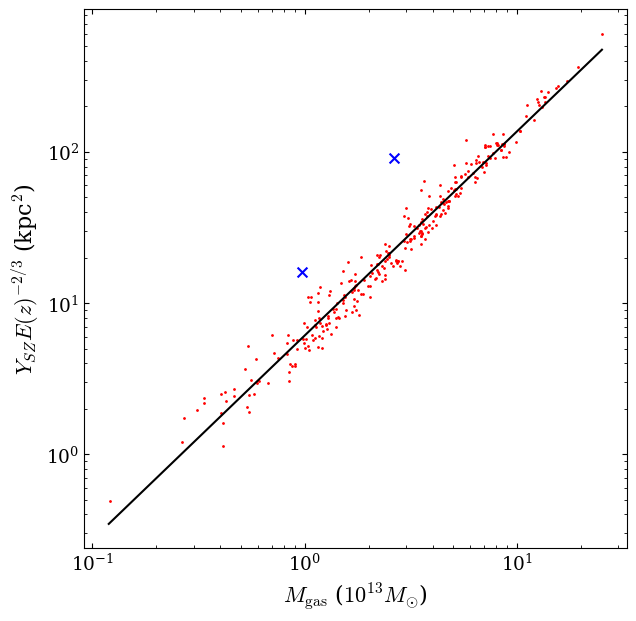

In [19]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')

fig, ax = plt.subplots(figsize=(7,7))
# data points # M*2 because M has unit 2e13 Msun
mask = np.isin(id, outlier_id)
ax.scatter(10**logM_[~mask][:N]*2, 10**logYSZ_[~mask][:N]*cf.PAR['YSZ-M']['CY'], s=1, color='r') # fitted non-outliers
ax.scatter(10**logM_[mask]*2, 10**logYSZ_[mask]*cf.PAR['YSZ-M']['CY'], s=50, color='b', marker='x') # all outliers

# --------------BEST FIT LINE----------------
logM_lin = np.linspace(np.min(logM_), np.max(logM_), 100)
logYSZ_lin = cf.predictlogY_(logM_lin, **best_fit)
ax.plot(10**logM_lin*2, 10**logYSZ_lin*cf.PAR['YSZ-M']['CY'], color='black')
# ------------END BEST FIT-------------------

ax.set(xlabel='$M_\\mathrm{{gas}}$ ($10^{{13}} M_{{\\odot}}$)',
       ylabel='$Y_{{SZ}}E(z)^{{-2/3}}$ (kpc$^2$)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# Summary

Before outlier removal
| Relation | $\log A$|   $A$   | $B$   | $\sigma$ | $\chi^2$ |
|----------|---------|---------|-------|----------|----------|
| LX-T     | 0.341   | 2.193   | 2.379 | 0.226    | 1.012    |
| YSZ-T    | 0.440   | 2.754   | 2.776 | 0.101    | 0.983    |
| LX-YSZ   | 0.371   | 2.350   | 0.851 | 0.213    | 1.009    |
| M-T      | 0.122   | 1.324   | 2.019 | 0.080    | 0.877    |
| LX-M     | -0.097  | 0.800   | 1.185 | 0.206    | 1.002    |
| YSZ-M    | -0.103  | 0.789   | 1.346 | 0.101    | 1.037    |


After outlier removal
| Relation | $\log A$|   $A$   | $B$   | $\sigma$ | $\chi^2$ |
|----------|---------|---------|-------|----------|----------|
| LX-T     | 0.329   | 2.133   | 2.473 | 0.142    | 1.020    |
| YSZ-T    | 0.437   | 2.735   | 2.793 | 0.087    | 0.931    |
| LX-YSZ   | 0.371   | 2.350   | 0.881 | 0.150    | 0.950    |
| M-T      | 0.122   | 1.324   | 2.019 | 0.080    | 0.877    |
| LX-M     | -0.133  | 0.736   | 1.249 | 0.080    | 1.003    |
| YSZ-M    | -0.109  | 0.778   | 1.351 | 0.094    | 0.985    |

In [21]:
10**0.341, 10**0.440, 10**0.371, 10**0.122, 10**-0.097, 10**-0.103

(2.192804935350449,
 2.7542287033381663,
 2.3496328208483073,
 1.3243415351946646,
 0.7998342550070284,
 0.7888601176185545)

In [22]:
10**0.329, 10**0.437, 10**0.371, 10**0.122, 10**-0.133, 10**-0.109

(2.1330449131465765,
 2.735268726306712,
 2.3496328208483073,
 1.3243415351946646,
 0.7362070974947361,
 0.7780365510398041)